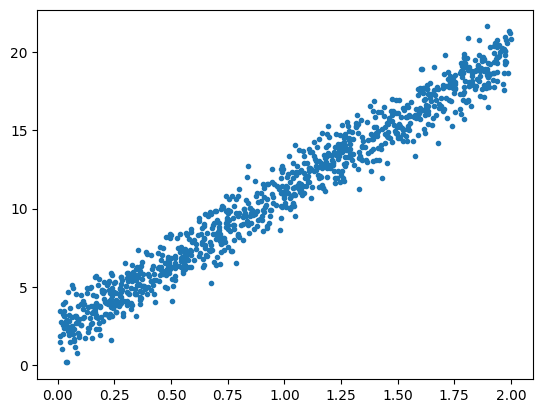

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

samples = 1000

X = 2*np.random.rand(samples, 1)
y = 2+9*X+np.random.randn(samples, 1)

plt.plot(X, y, '.')

In [25]:
X = np.c_[np.ones(samples), X]
X[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


---

## Computational complexity with Normal equation

The normal equations used in last lecture requires inverting the matrix $X^TX$ which computational complexity reaches $\mathcal{O}(n^3)$ for normal inversion, and $\mathcal{O}(n^2)$ using pseudo-inverse or scikit-learns LinearRegression class.

So if $X$ is $[m,n]$ then $X^TX$ is $[n,m]\times[m,n] = [n,n]$, which means that the computational complexity depends on the number of features. This becomes a problem for large amount of features e.g. 100000. 

---

## Gradient descent

Another way and more general way to train linear regression is by using gradient descent, which is an iterative optimization approach. It works by taking a cost function e.g. MSE, 

$$C = \frac{1}{m}\sum_{i=1}^m (y_i - \hat{y}_i)^2 = \frac{1}{m} \sum_{i=1}^m (y_i - \vec{\theta}\cdot \vec{x}_i)^2$$

Here $\vec{\theta}$ are the parameters that is weights and bias or $\hat{\beta}$ when referred to last lecture.

The main idea with gradient descent is to minimize the cost function (a number representing the error, between label and prediction) through taking small steps one at a time in the direction of the steepest descent. Through multivariate calculus the steepest ascent is the gradient of the multivariate function, so we take the negative diretion of the gradient. 

$$\vec{\theta}_{j+1} = \vec{\theta}_j - \eta\nabla_{\vec{\theta}} C(\vec{\theta})$$

where $\eta$ is the learning rate, $\nabla_{\vec\theta}$ is the gradient w.r.t. $\vec{\theta}$ and $j$ is the iteration step. By adjusting $\eta$ we get different step sizes. With some calculus the gradient becomes:

$$\nabla_{\vec\theta} C(\vec{\theta}) = \ldots = \frac{2}{m}X^T(X\vec{\theta}-\vec{y})$$

This is called batch gradient descent as it uses whole training batch, which will be slow on large training set.

In [27]:
def gradient_descent(X, y, learning_rate=.1, iterations=100):
    m = len(X)

    theta = np.random.randn(X.shape[1], 1)

    for _ in range(iterations):
        gradient = (2/m) * X.T @ (X @ theta - y) 
        theta -= learning_rate*gradient
    return theta

theta = gradient_descent(X_train, y_train)
theta

array([[2.30053512],
       [8.82081873]])

In [28]:
steps = range(1,200,1)
thetas = [gradient_descent(X, y, iterations=iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)
thetas.shape

(199, 2)

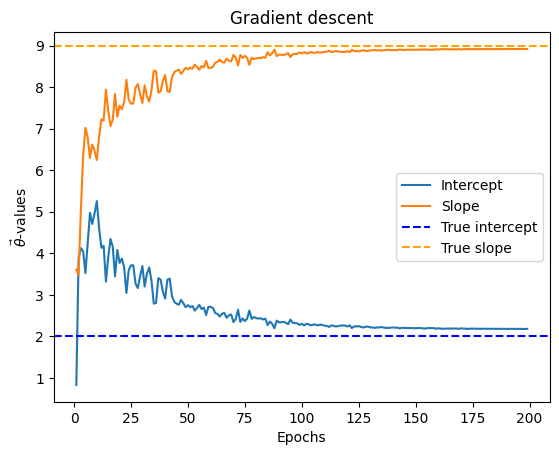

In [30]:
fig, ax = plt.figure(dpi=100), plt.axes()

ax.plot(steps, thetas, label = ["Intercept", "Slope"])
ax.axhline(y=2, color='b', linestyle='--', label="True intercept")
ax.axhline(y=9, color='orange', linestyle='--', label="True slope")
ax.set(xlabel="Epochs", ylabel=r'$\vec{\theta}$-values', title="Gradient descent")
ax.legend()

In [33]:
epochs = 10
t0, t1 = 5, 50

def learning_rate_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1)

m = len(X_train)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1]
        y_i = y_train[random_index:random_index+1]
        gradients = 2*x_i.T.dot(x_i.dot(theta)-y_i)
        eta = learning_rate_schedule(epoch*m+i)
        theta -= eta*gradients

theta

array([[2.2386128 ],
       [8.92792137]])

In [34]:
y_pred = X_test@theta

MAE = np.mean(np.absolute(y_test-y_pred))
MSE = np.mean(np.square((y_test-y_pred)))
RMSE = np.sqrt(MSE)

MAE ,MSE, RMSE

(np.float64(0.7684657072096024),
 np.float64(0.9556723467065891),
 np.float64(0.9775849562603698))